<a href="https://colab.research.google.com/github/rani-sikdar/Natural-Language-Processing-NLP-Learning/blob/main/Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from nltk.stem import PorterStemmer, WordNetLemmatizer
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
# from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
name =['target', 'ids', 'date', 'flag', 'user', 'text']
# link of dataset - https://www.kaggle.com/datasets/kazanova/sentiment140

df= pd.read_csv('/content/drive/MyDrive/twitter_train.csv', encoding= 'latin_1', header= None, names= name)

In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
# percentage of missing values
round((df.isnull().sum() / df.shape[0])* 100,2)

target    0.0
ids       0.0
date      0.0
flag      0.0
user      0.0
text      0.0
dtype: float64

<Axes: xlabel='target', ylabel='count'>

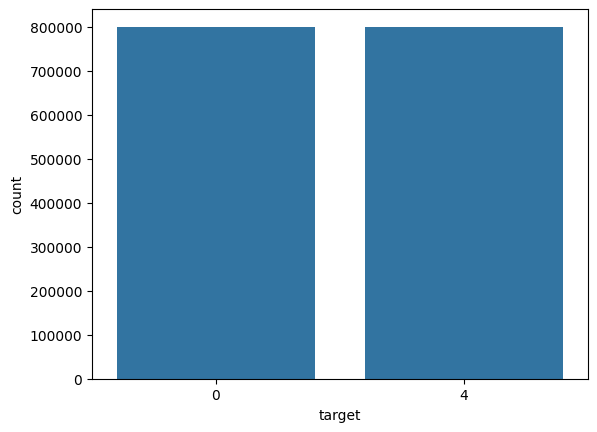

In [ ]:
sns.countplot(x="target", data=df)

In [ ]:
#  we only need two colums- target and text
df= df[['target', 'text']]
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# data preprocessing

In [ ]:
df['text'][0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [ ]:
df['text'][1]

"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

In [ ]:
df['text'][5]

'@Kwesidei not the whole crew '

In [ ]:
df['text']= df['text'].apply(lambda x: re.sub(r'@\w+\s*', '', x)) # for removing twitter username (@)

In [ ]:
df['text'][0]

"http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [ ]:
df['text'][5]

'not the whole crew '

In [ ]:
df['text']= df['text'].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))

In [ ]:
df['text']= df['text'].str.lower()

In [ ]:
df['text'][5]

'not the whole crew '

In [ ]:
# removing stop words
from nltk.corpus import stopwords

In [ ]:
>>> import nltk
>>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords_list = stopwords.words('english')

In [ ]:
len(stopwords_list)

179

In [ ]:
df['text']= df['text'].apply(lambda sentence: " ".join([word for word in sentence.split() if word not in stopwords_list ] ))

In [ ]:
# removing the numbers
df['text']= df['text'].apply(lambda x: re.sub(r'[0-9]+', '', x))

In [ ]:
# removing the puntuations
df['text']= df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [ ]:
df['text']= df['text'].apply(lambda sentence: " ".join([word for word in sentence.split() if word not in stopwords_list ] ))

### Tokenization

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
>>> import nltk
>>> nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['text']= df['text'].apply(lambda x : word_tokenize(x) )

In [ ]:
df['text'][50]

['broadband',
 'plan',
 'massive',
 'broken',
 'promise',
 'via',
 'wwwdiigocomtautao',
 'still',
 'waiting',
 'broadband']

### Lemmetiazation

In [ ]:
>>> import nltk
>>> nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lem= WordNetLemmatizer()
df['text']= df['text'].apply(lambda word_list : [lem.lemmatize(word) for word in word_list])

In [ ]:
df['text'][10]

['spring', 'break', 'plain', 'city', 'snowing']

In [ ]:
lem.lemmatize('thinking','v')

'think'

## Stemming

In [ ]:
pst= nltk.PorterStemmer()

df['text']= df['text'].apply(lambda word_list : [pst.stem(word) for word in word_list])  # removing ing/ss/ness

In [ ]:
df['text']= df['text'].apply(lambda word_list : " ".join(list(set(word_list))))  # join all words

## Model Training

In [ ]:
from sklearn.model_selection import train_test_split
X= df['text']
y= df['target']
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.7, random_state=55)

In [ ]:
X_train

197811                      famili favorit get divorc better
1469965    tri new contest cover quottryquot check jess b...
884099     movin schedul im get celeb hour hahaha alreadi...
1164709                        life lol gaga best day follow
1537244                            say common agre haha sens
                                 ...                        
403429                                someon kati ruin perri
1439677                        peopl lot fun light race stop
1131464    teach could plu fli new stay hotel thing audie...
1053338    like convers imagin thing take place abc sad a...
1438157                           potna loft look good condo
Name: text, Length: 1120000, dtype: object

## Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec= TfidfVectorizer(ngram_range=(1,2), max_features=50000)
X_train= vec.fit_transform(X_train)

In [ ]:
X_test= vec.fit_transform(X_test)

## Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred= LR.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.36      0.44    239998
           4       0.53      0.74      0.62    240002

    accuracy                           0.55    480000
   macro avg       0.56      0.55      0.53    480000
weighted avg       0.56      0.55      0.53    480000



In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred= BNB.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61    239998
           4       0.61      0.62      0.61    240002

    accuracy                           0.61    480000
   macro avg       0.61      0.61      0.61    480000
weighted avg       0.61      0.61      0.61    480000

